In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

In [3]:
from connection import *

con = connect()

Connection Successful


In [4]:
query_1 = '''
select * from constant_therapy.context_action_dis
'''
data1 = SQL(query_1, con)

In [5]:
data1.nunique()

id                      7623691
patient_id               104743
task_type_id                 98
task_level                   12
completed_task_count        129
accuracy                   1386
domain_id                    14
condition_since              14
birth_year                  121
disorder_id                  12
start_time                 2185
start_time_min          7312972
end_time                   2184
end_time_min            7162785
dtype: int64

In [23]:
pd.unique(data1["disorder_id"])

array([   2,    3,    1, 9999,    4,    5,    8,    9,    6,    7,   10,
         11])

In [7]:
data1.to_csv("disorder.csv")

2023-05-04 01:14:13,256| ERROR   | Socket exception: Connection reset by peer (54)


In [8]:
data1.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min
0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24
1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24
2,639141,15796,20,1,2,0.032,1,5y,1950,2,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40
3,639141,15796,20,1,2,0.032,1,5y,1950,3,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40
4,659924,16441,20,1,3,1.000,1,6m,1959,2,2014-08-08,2014-08-08 16:21:14,2014-08-08,2014-08-08 16:21:54


In [9]:
disorder1 = data1[data1["disorder_id"] == 1]


<Axes: >

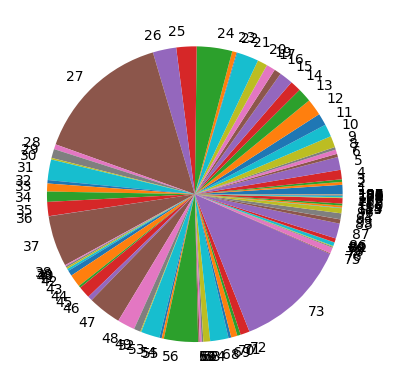

In [10]:
disorder1.groupby("task_type_id").size().plot.pie()

<Axes: >

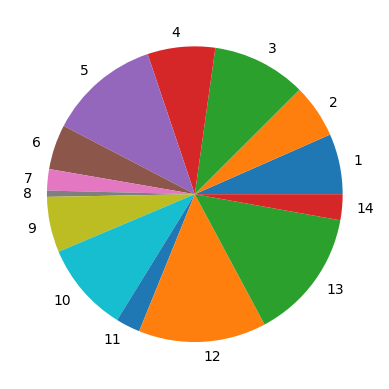

In [11]:
disorder1.groupby("domain_id").size().plot.pie()

<Axes: >

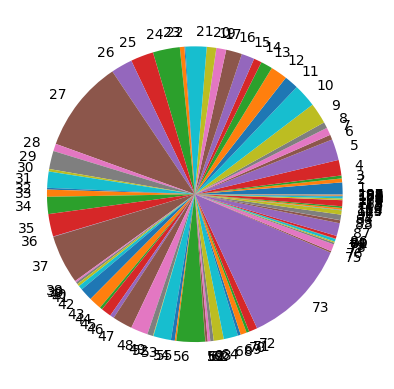

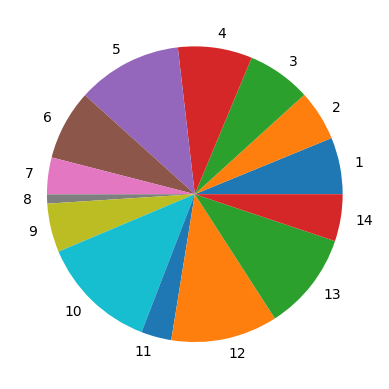

In [13]:
disorder3 = data1[data1["disorder_id"] == 3]
plt.figure(1)
disorder3.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder3.groupby("domain_id").size().plot.pie()

<Axes: >

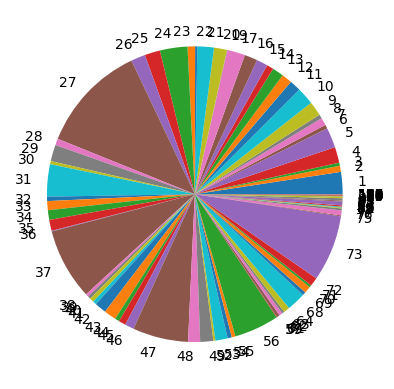

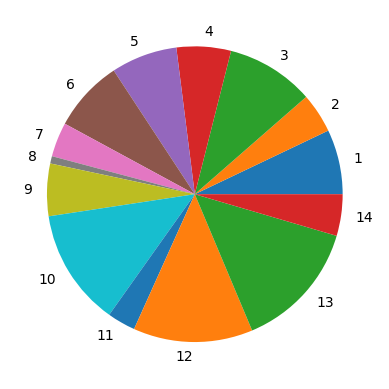

In [14]:
disorder4 = data1[data1["disorder_id"] == 4]
plt.figure(1)
disorder4.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder4.groupby("domain_id").size().plot.pie()

<Axes: >

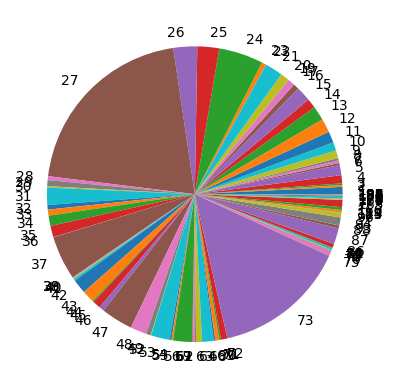

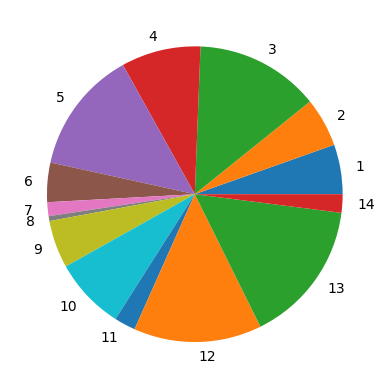

In [15]:
disorder5 = data1[data1["disorder_id"] == 5]
plt.figure(1)
disorder5.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder5.groupby("domain_id").size().plot.pie()

<Axes: >

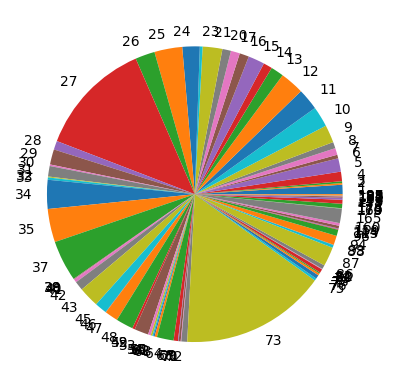

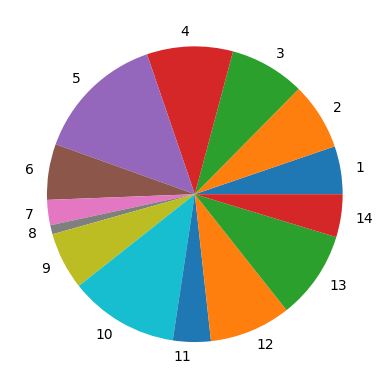

In [17]:
disorder6 = data1[data1["disorder_id"] == 6]
plt.figure(1)
disorder6.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder6.groupby("domain_id").size().plot.pie()

<Axes: >

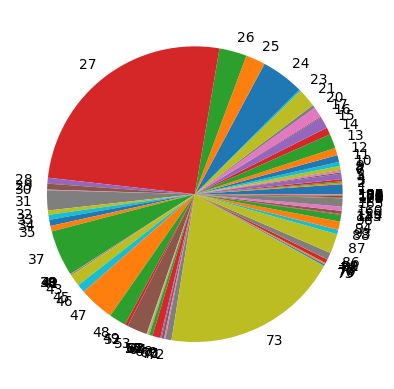

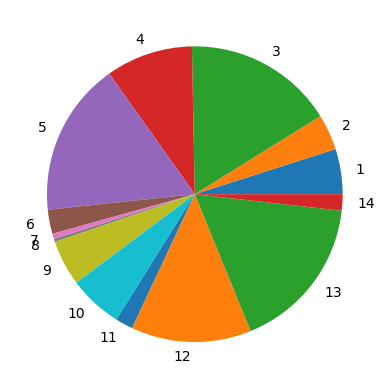

In [18]:
disorder7 = data1[data1["disorder_id"] == 7]
plt.figure(1)
disorder7.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder7.groupby("domain_id").size().plot.pie()

<Axes: >

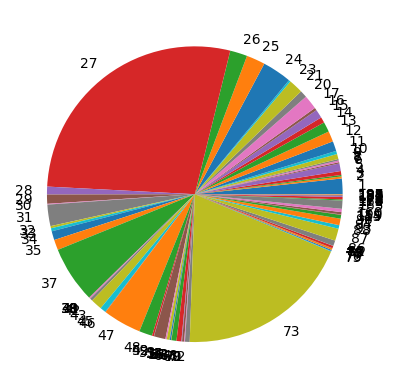

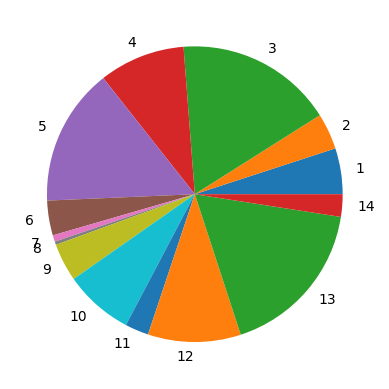

In [19]:
disorder8 = data1[data1["disorder_id"] == 8]
plt.figure(1)
disorder8.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder8.groupby("domain_id").size().plot.pie()

<Axes: >

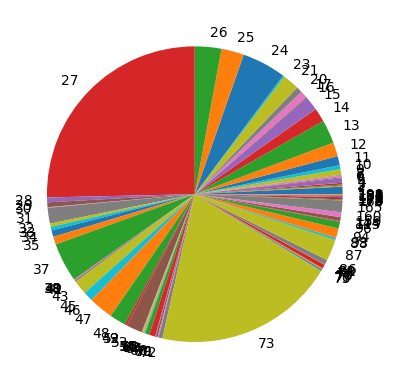

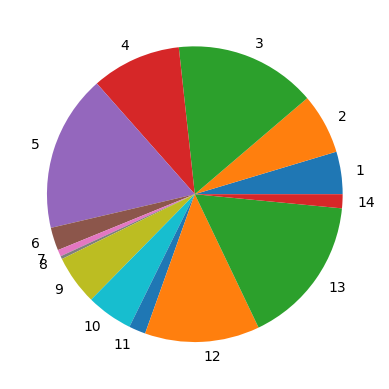

In [20]:
disorder9 = data1[data1["disorder_id"] == 9]
plt.figure(1)
disorder9.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder9.groupby("domain_id").size().plot.pie()

<Axes: >

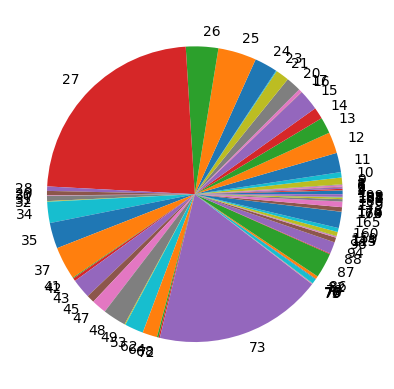

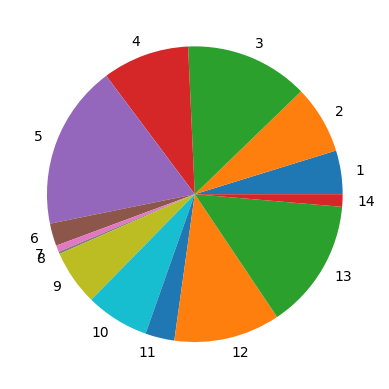

In [21]:
disorder10 = data1[data1["disorder_id"] == 10]
plt.figure(1)
disorder10.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder10.groupby("domain_id").size().plot.pie()

<Axes: >

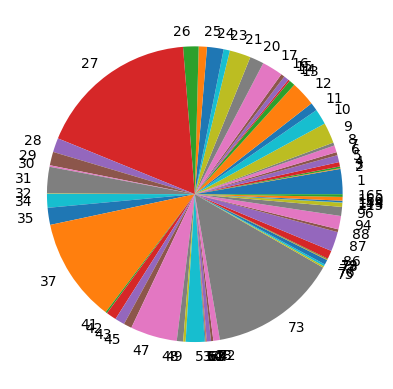

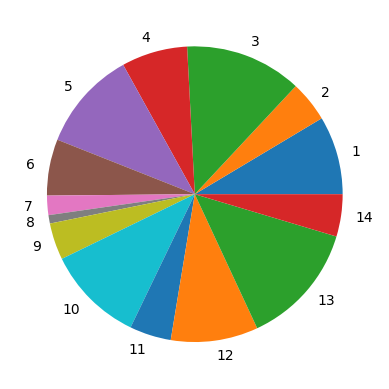

In [22]:
disorder11 = data1[data1["disorder_id"] == 11]
plt.figure(1)
disorder11.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder11.groupby("domain_id").size().plot.pie()

<Axes: >

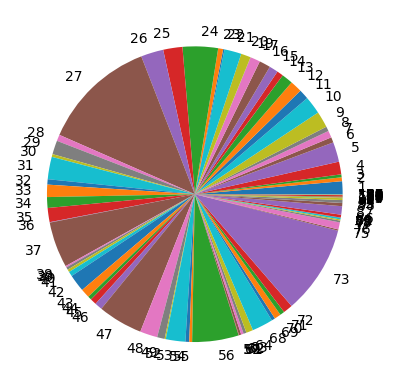

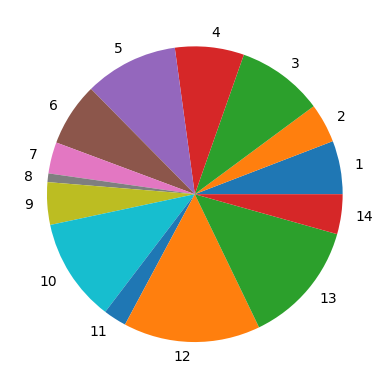

In [24]:
disorder9999 = data1[data1["disorder_id"] == 9999]
plt.figure(1)
disorder9999.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder9999.groupby("domain_id").size().plot.pie()